In [1]:
import pandas as pd
import numpy as np
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
### prepare data
raw_csv = pd.read_csv("resources/Index2018.csv")
df_comp = raw_csv.copy()

### keep only one column
df_comp['date'] = pd.to_datetime(df_comp.date , dayfirst = True)
df_comp.set_index('date' , inplace = True)
df_comp['market_value'] = df_comp.spx
df_comp = df_comp[['market_value']]
df_comp = df_comp.asfreq('b')

df_comp['market_value'] = df_comp['market_value'].fillna(method = 'ffill')

### ACF

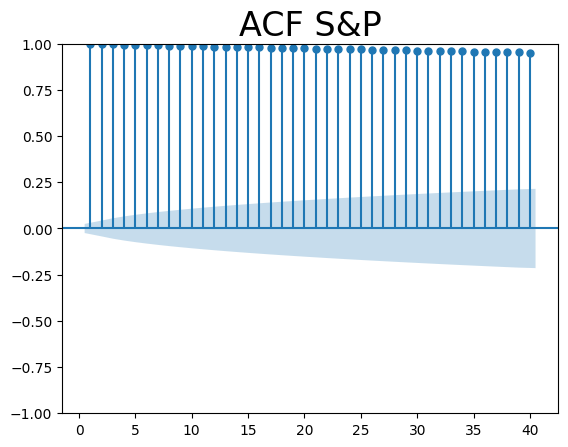

In [3]:
sgt.plot_acf(df_comp.market_value , lags = 40 , zero = False)
plt.title("ACF S&P" , size = 24)
plt.show()

From graph we see all data significant, which means that it's time dependent data

### PACF

We want to see the actual affect on the current time stamp.

It cancels out all additional channels a previous period value affects the present one.

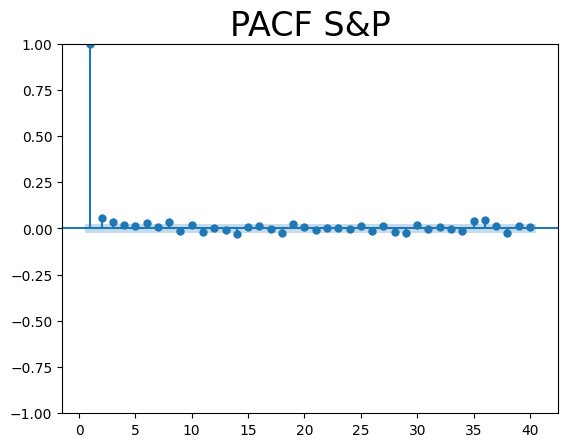

In [7]:
sgt.plot_pacf(df_comp.market_value , lags = 40 , zero = False , method = ("ols"))
plt.title("PACF S&P" , size = 24)
plt.show()